# <center> <span style="color:blue"> Speech Recognition

### Import Libraries

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import scipy.signal as signal
import math
import noisereduce as nr
from IPython.display import Audio, IFrame, display
from scipy.signal import hilbert
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import soundfile as sf
import malaya_speech
import webrtcvad
from webrtcvad import Vad
from malaya_speech import Pipeline
import keras

C:\Users\Esraa\Anaconda3\lib\site-packages\malaya_boilerplate\frozen_graph.py:35: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  'Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0'


### Import Model

In [2]:
model = keras.models.load_model('8_words.h5')

In [3]:
classes = ["down","go","left","off","on","right","stop","up"]

### Input from user

In [105]:
# USER INPUT

# Sampling frequency
freq = 16000
  
# Recording duration
duration = 2
  
# Start recorder 
recording = sd.rec(int(duration * freq), 
                   samplerate=freq, channels=1)
  
# Record audio for the given number of seconds
sd.wait()
  
# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("record.wav", freq, recording)
  
# Convert the NumPy array to audio file
wv.write("record.wav", recording, freq, sampwidth=2)

In [106]:
wave, sr = sf.read("record.wav", dtype='float32')  
sd.play(wave, sr)
status = sd.wait()  # Wait until file is done playing


PortAudioError: Error opening OutputStream: Unanticipated host error [PaErrorCode -9999]: 'The specified format is not supported or cannot be translated.  Use the Capabilities function to determine the supported formats.' [MME error 32]

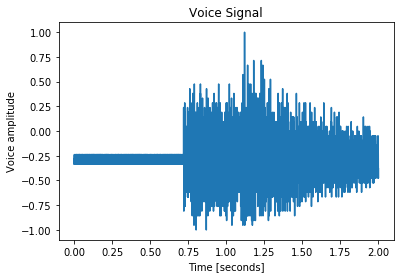

In [103]:
# Signal in TIME Domain
samples = wave
time = np.linspace(0, len(samples - 1) / sr, len(samples - 1))
plt.plot(time,samples)  
plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

## Preprocessing Steps:
> - <span style="color:blue"> Noise Reduction <br>
> - <span style="color:blue"> Silence Removal <br>
> - <span style="color:blue"> Adjusting audio size<br>
> - <span style="color:blue"> Extracting MFCCs

In [95]:
# NOISE REDUCTION
fs = sr
samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)

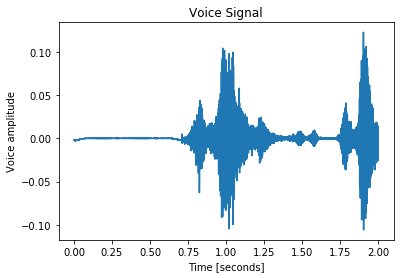

In [96]:
# Signal after noise reduction

plt.plot(time, samples)  
plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

In [97]:
# SILENCE REMOVAL

vad = malaya_speech.vad.webrtc()
y_= malaya_speech.resample(samples, sr, 16000)
y_ = malaya_speech.astype.float_to_int(y_)
frames = malaya_speech.generator.frames(samples, 30, sr)
frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
y_ = malaya_speech.combine.without_silent(frames_webrtc)

In [98]:
# ADJUSTING AUDIO SIZE
size = (1*sr+4000)-y_.shape[0]
zero = np.zeros(size)
signal = np.concatenate((y_,zero))


ValueError: negative dimensions are not allowed

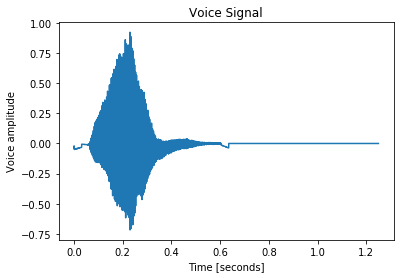

In [99]:
Time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
plt.plot(Time,signal)
plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

In [100]:
#signal = signal[2000:]
#signal.shape
#size = (1*sr+5000)-signal.shape[0]
#zero = np.zeros(2000)
#signal = np.concatenate((signal,zero))

In [71]:
sd.play(signal, sr)

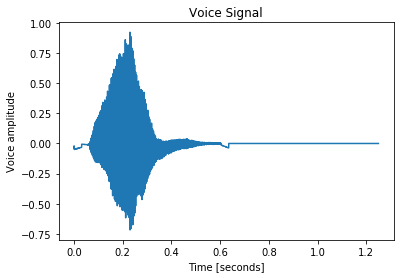

In [72]:
Time = np.linspace(0, len(signal - 1) / fs, len(signal - 1))
plt.plot(Time,signal)
plt.title("Voice Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

In [73]:
# EXTRACTING MFCCs
mfcc_feat = mfcc(signal , fs, winlen=256/fs, winstep=256/(2*fs), numcep=13, nfilt=26, nfft=256,
             lowfreq=0, highfreq=fs/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
audio = np.transpose(mfcc_feat)

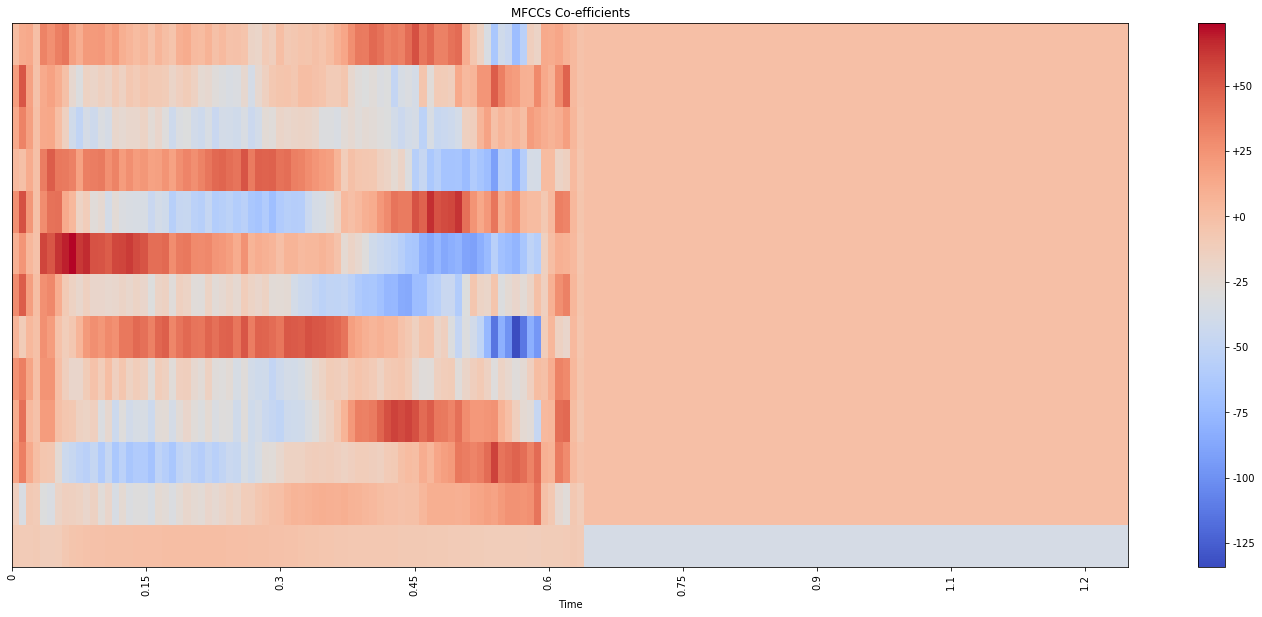

In [74]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(audio, hop_length=128, x_axis="time", sr=fs)
plt.title("MFCCs Co-efficients")
plt.xticks(rotation = 90)
plt.colorbar(format="%+2.f")

In [75]:
audio.shape

(13, 156)

In [76]:
d1 = np.array(audio.shape[0])
d2 = np.array(audio.shape[1])
d = d1*d2

In [77]:
r = []
r = model.predict(audio.reshape(1,d))
r


array([[2.0883542e-06, 6.9451518e-14, 0.0000000e+00, 1.3765872e-17,
        9.9999785e-01, 1.1014768e-13, 4.8174253e-32, 0.0000000e+00]],
      dtype=float32)

In [78]:
ind = np.argmax(r)
print('**** predicted output is: ',classes[ind], '****')

**** predicted output is:  on ****
